In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
import cftime
import nc_time_axis
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.dates as mdates



In [2]:
ds_ap = xr.open_dataset('/badc/cmip6/data/CMIP6/CFMIP/NCAR/CESM2/aqua-control/r1i1p1f1/Amon/va/gn/latest/va_Amon_CESM2_aqua-control_r1i1p1f1_gn_000101-001012.nc')
ds_amip = xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1/Amon/va/gn/latest/va_Amon_CESM2_amip_r1i1p1f1_gn_195001-201412.nc')
ds_hist = xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/va/gn/latest/va_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc')

/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'va' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'va' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'va' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


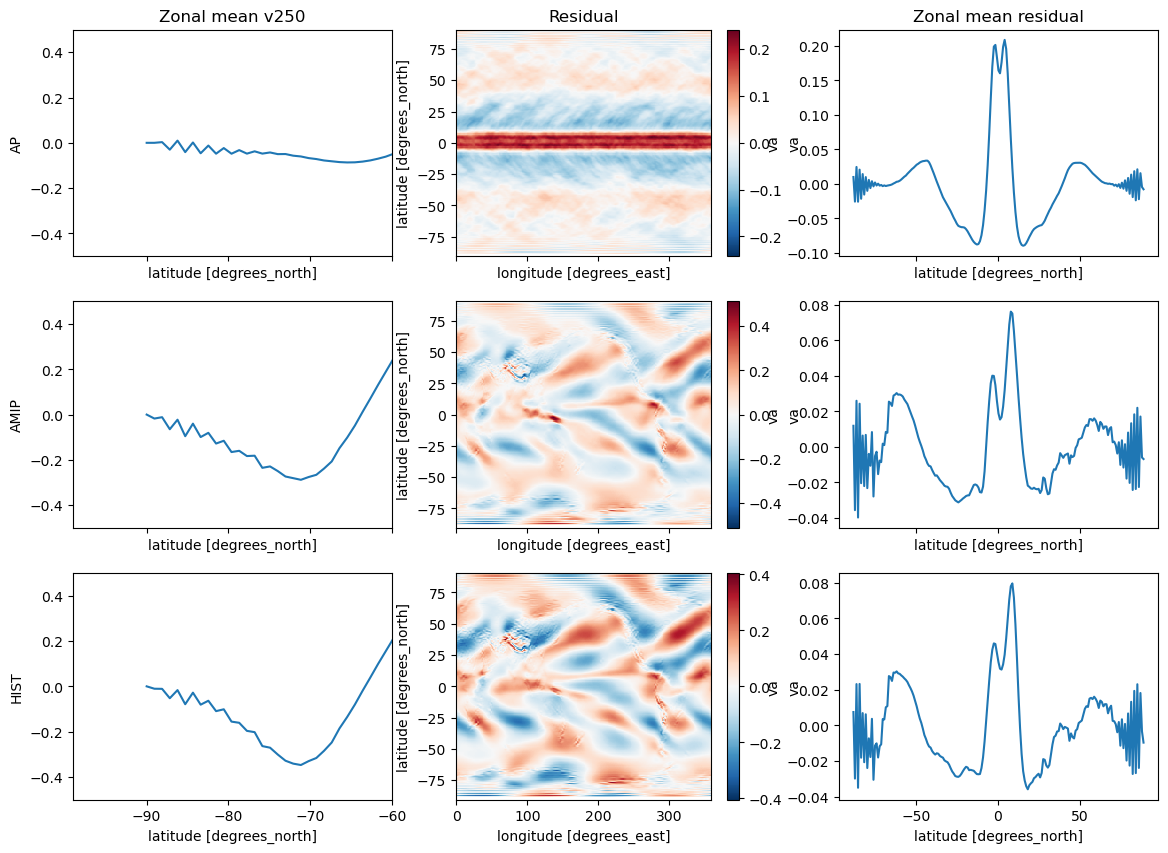

In [3]:
datasets = [ds_ap, ds_amip, ds_hist]
labels = ['AP', 'AMIP', 'HIST']

fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(14, 10), sharex='col'
)

for i, (ds, label) in enumerate(zip(datasets, labels)):

    # Select ~250 hPa and time mean
    va_250 = ds['va'].sel(plev=25000, method='nearest').mean(dim='time')

    # Raw data zoomed in
    va_zonal = va_250.mean(dim='lon')
    va_zonal.plot(ax=axes[i, 0])
    axes[i, 0].set_xlim(xmax=-60)
    axes[i, 0].set_ylim(ymin=-0.5, ymax=0.5)
    axes[i, 0].set_title('Zonal mean v250' if i == 0 else '')
    axes[i,0].set_ylabel(label)
    
    # Residual map
    smoothv = va_250.rolling(lat=4, center=True).mean()
    v = va_250 - smoothv
    v.plot(ax=axes[i, 1])
    axes[i, 1].set_title('Residual' if i == 0 else '')

    # Zonal mean residual
    v_zonal = v.mean(dim='lon')
    v_zonal.plot(ax=axes[i, 2])
    axes[i, 2].set_title('Zonal mean residual' if i == 0 else '')

plt.tight_layout
plt.savefig('ncar_v')
plt.show()

In [4]:
smoothv = va_250.rolling(lat=4, center=True).mean().mean(dim=['time'])
v = va_250.mean(dim=['time']) - smoothv

v.plot()
plt.show()

v.mean('lon').plot()

ValueError: 'time' not found in array dimensions ('lat', 'lon')

In [ ]:
ds_hist.attrs